# K-NEAREST NEIGHBOURS

### Tasks

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'C:\D Drive\Data_Science\01 Assignments\16 KNN\Zoo.csv')

In [3]:
data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [4]:
data.shape

(101, 18)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [6]:
## target column is type while remaining columns are features

In [7]:
data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
## missing values
data.isnull().sum()

animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64

In [9]:
## duplicate rows
data.duplicated().any()

False

In [10]:
## There are no missing values or duplicate rows

In [11]:
data['animal name'].unique()

array(['aardvark', 'antelope', 'bass', 'bear', 'boar', 'buffalo', 'calf',
       'carp', 'catfish', 'cavy', 'cheetah', 'chicken', 'chub', 'clam',
       'crab', 'crayfish', 'crow', 'deer', 'dogfish', 'dolphin', 'dove',
       'duck', 'elephant', 'flamingo', 'flea', 'frog', 'fruitbat',
       'giraffe', 'girl', 'gnat', 'goat', 'gorilla', 'gull', 'haddock',
       'hamster', 'hare', 'hawk', 'herring', 'honeybee', 'housefly',
       'kiwi', 'ladybird', 'lark', 'leopard', 'lion', 'lobster', 'lynx',
       'mink', 'mole', 'mongoose', 'moth', 'newt', 'octopus', 'opossum',
       'oryx', 'ostrich', 'parakeet', 'penguin', 'pheasant', 'pike',
       'piranha', 'pitviper', 'platypus', 'polecat', 'pony', 'porpoise',
       'puma', 'pussycat', 'raccoon', 'reindeer', 'rhea', 'scorpion',
       'seahorse', 'seal', 'sealion', 'seasnake', 'seawasp', 'skimmer',
       'skua', 'slowworm', 'slug', 'sole', 'sparrow', 'squirrel',
       'starfish', 'stingray', 'swan', 'termite', 'toad', 'tortoise',
       

In [12]:
## check outliers
num_col=[i for i in data.columns if data[i].dtypes!='O']

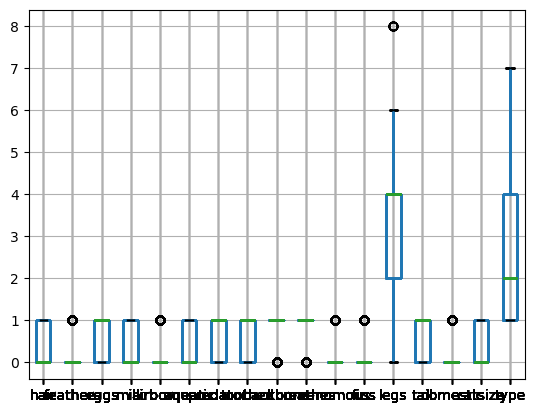

In [13]:
for i in num_col:
    data.boxplot(column=num_col)
plt.show();

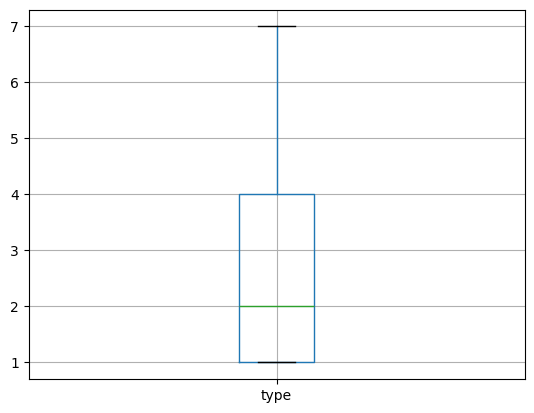

In [14]:
data.boxplot('type')
plt.show();

In [15]:
## checking all the numerical columns shows no presence of outliers as the data is within normal range.

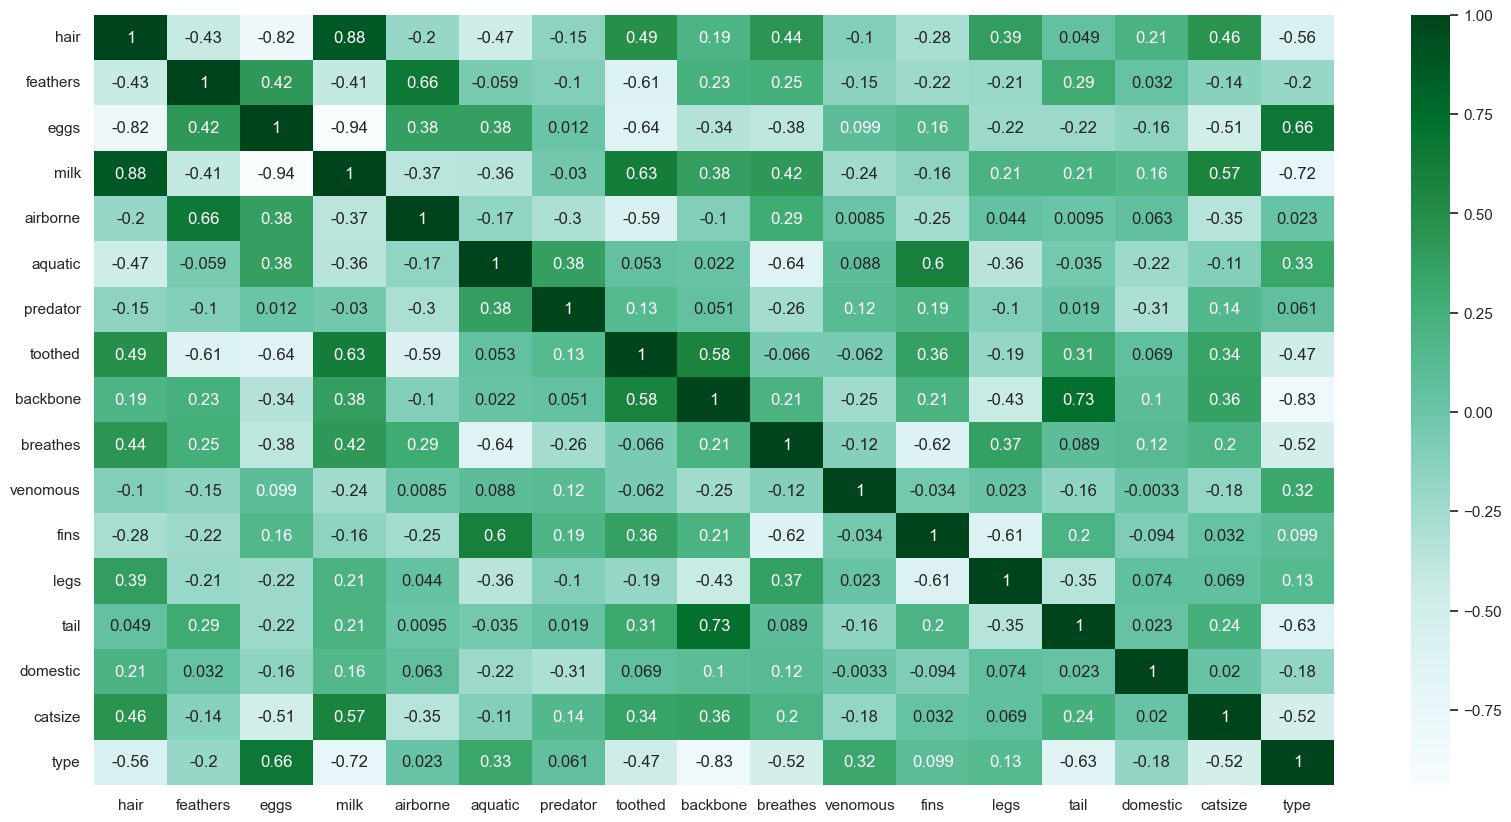

In [16]:
## checking correlation
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(data[num_col].corr(),annot=True,cmap='BuGn')
plt.show();

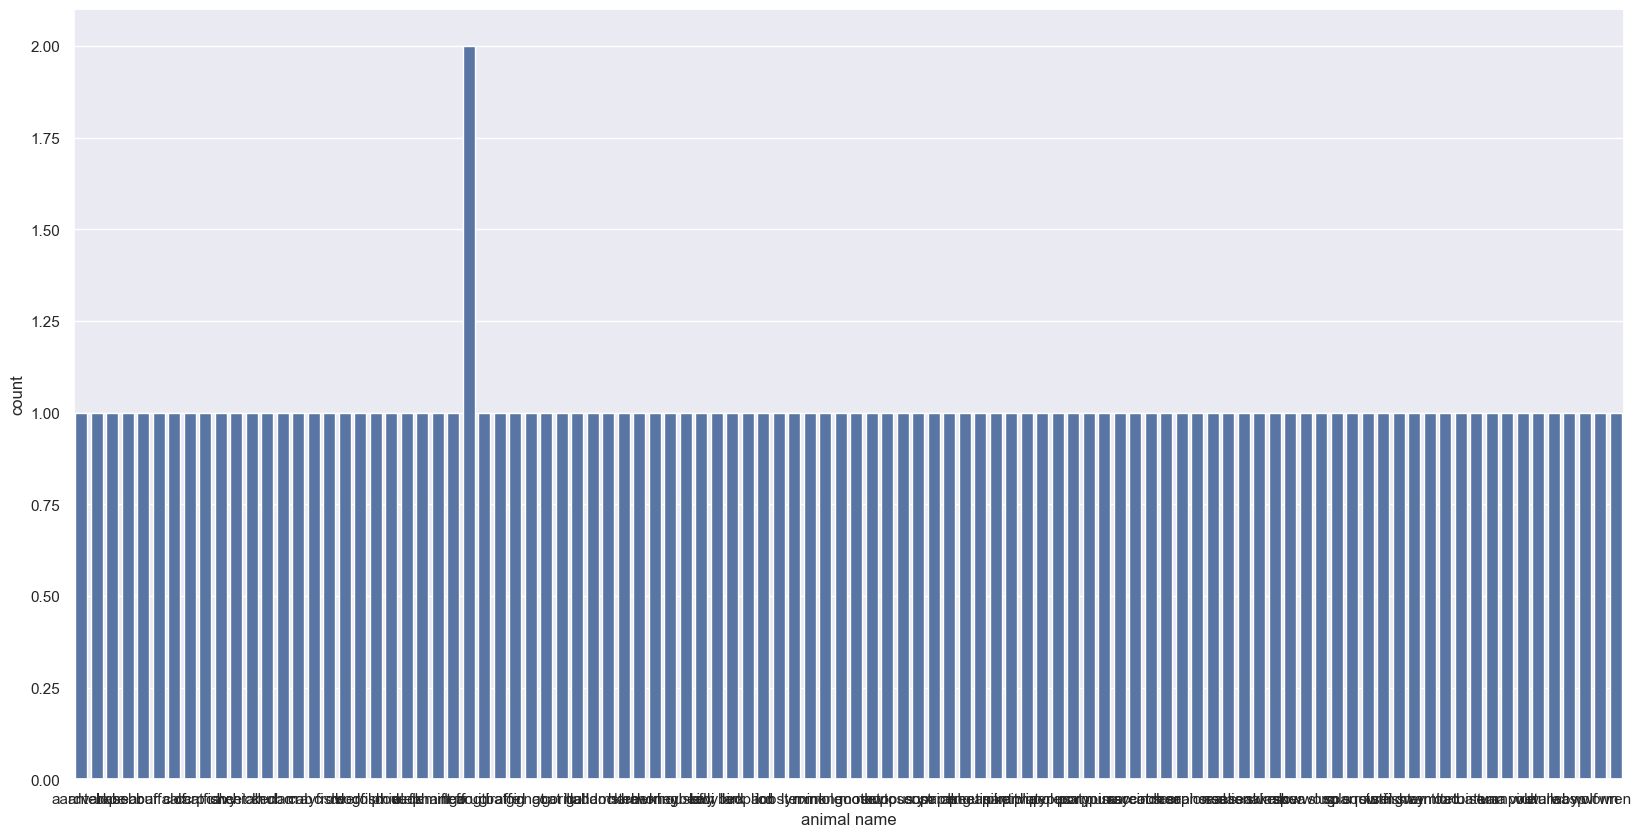

In [17]:
sns.countplot(x='animal name',data=data)
plt.show();

In [18]:
a=data['animal name'].value_counts()

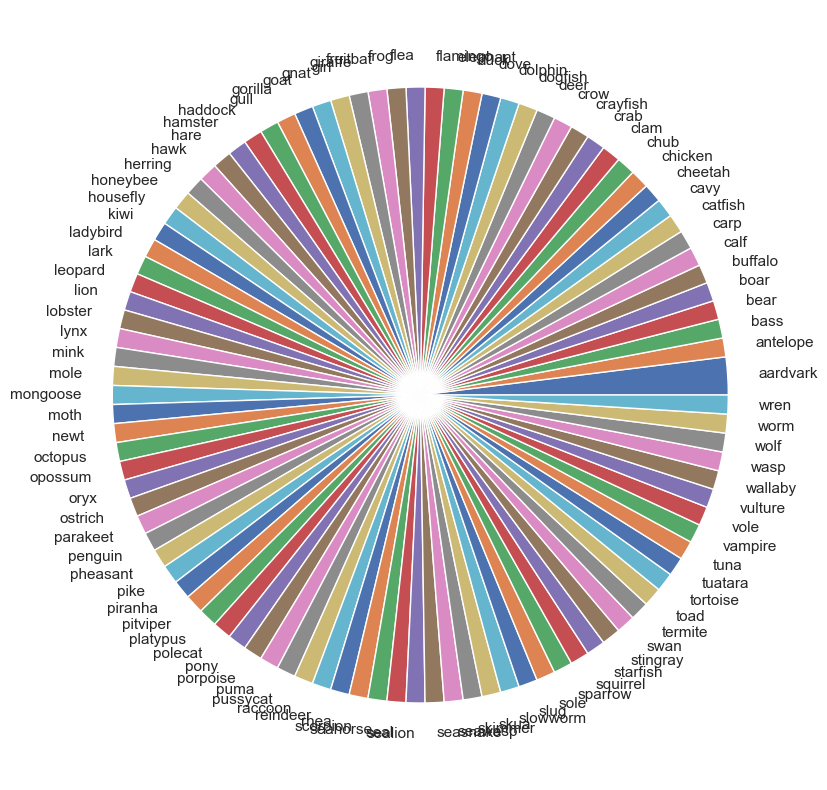

In [19]:
plt.pie(a,labels=data['animal name'].unique())
plt.show();

In [20]:
## since we have lot of categories in animal name, it is difficult to visualize
## heatmap shows correlation between features and target

In [21]:
## we will use ordinal encoder to convert animal name column to numerical

In [22]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc=OrdinalEncoder()

In [23]:
data['animal name']=ord_enc.fit_transform(data[['animal name']])

In [24]:
## split target and features
features=data.drop('type',axis=1)
target=data[['type']]

In [25]:
features

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,0.0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1.0,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,2.0,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,3.0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,4.0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,95.0,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,96.0,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,97.0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,98.0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [26]:
target

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [27]:
## we will use Min Max scaler to normalize the features

In [28]:
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [29]:
min_max=MinMaxScaler()

In [30]:
features=min_max.fit_transform(features)

In [31]:
features

array([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.01010101, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.02020202, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.97979798, 1.        , 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.98989899, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 1.        , ..., 1.        , 0.        ,
        0.        ]])

In [32]:
## train test split
from sklearn.model_selection import train_test_split,GridSearchCV

In [33]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [34]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(80, 17)
(21, 17)
(80, 1)
(21, 1)


### KNN Model building

In [35]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,classification_report

In [36]:
## define the model with default hyperparameter
knn=KNeighborsClassifier(n_neighbors=1)

In [37]:
## build model
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [38]:
## predict target
y_pred=knn.predict(x_test)

In [39]:
## check accuracy
accuracy_score(y_test,y_pred)

1.0

In [40]:
params={'n_neighbors':[1,2,3,4,5,6,7]}

In [41]:
grid_search=GridSearchCV(knn,params)

In [42]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=1),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7]})

In [43]:
grid_search.best_params_

{'n_neighbors': 1}

In [44]:
## grid search shows best hyperparameter n_neighbor is 1

In [45]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



In [46]:
## since this is a small dataset we have achieved 100% accuracy in testing validation

In [47]:
y_pred_train=knn.predict(x_train)

In [48]:
accuracy_score(y_train,y_pred_train)

1.0

In [49]:
## accuracy in training validation is also 100%

#### Visualization

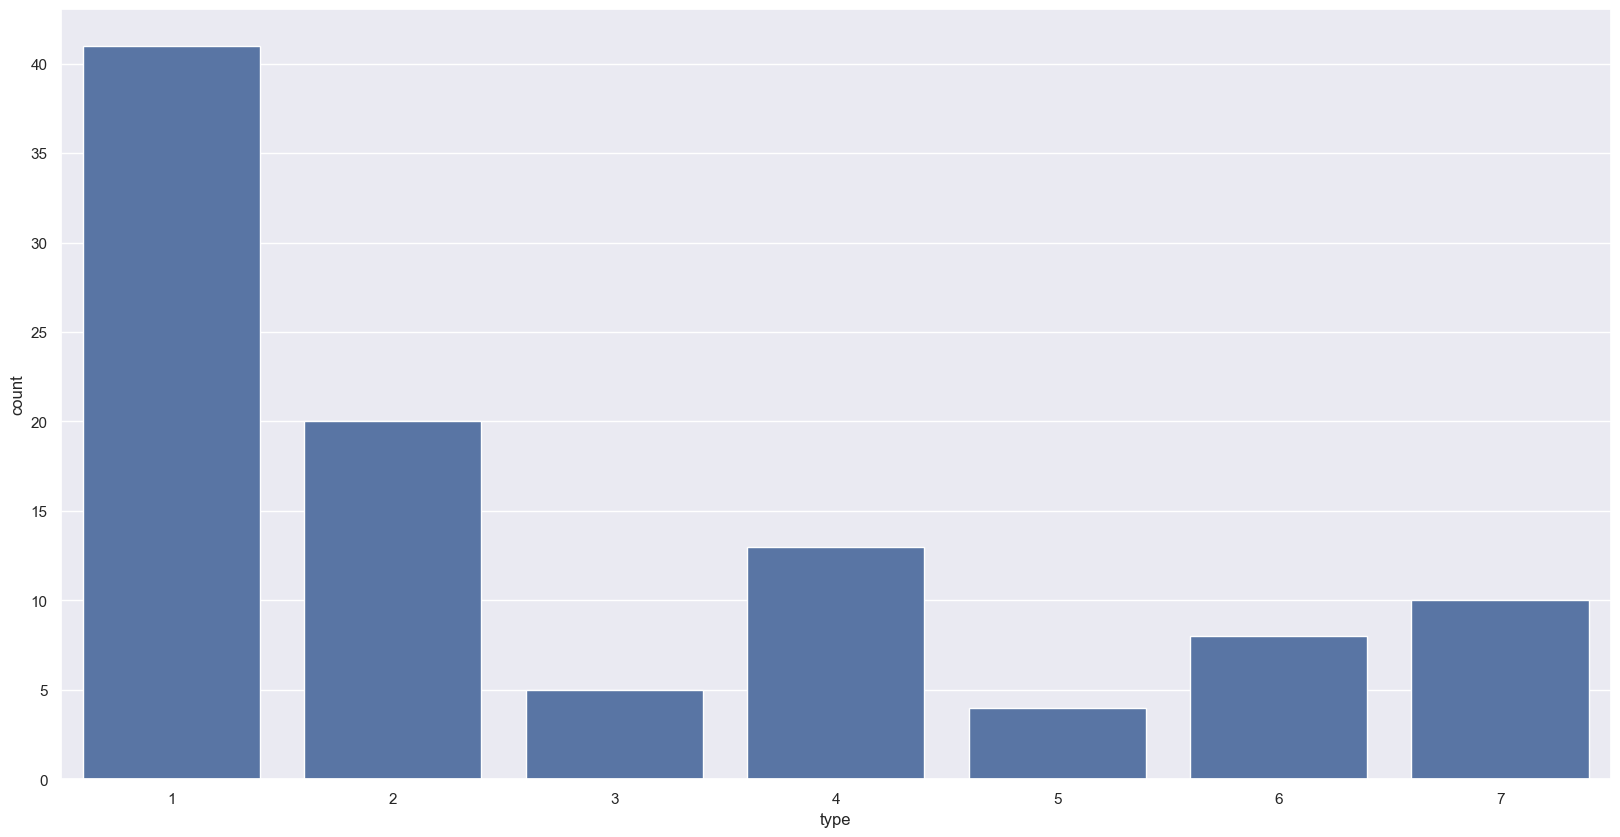

In [50]:
sns.countplot(x='type',data=data)
plt.show();

In [51]:
## plotting k values against cross validation scores
from sklearn.model_selection import cross_val_score

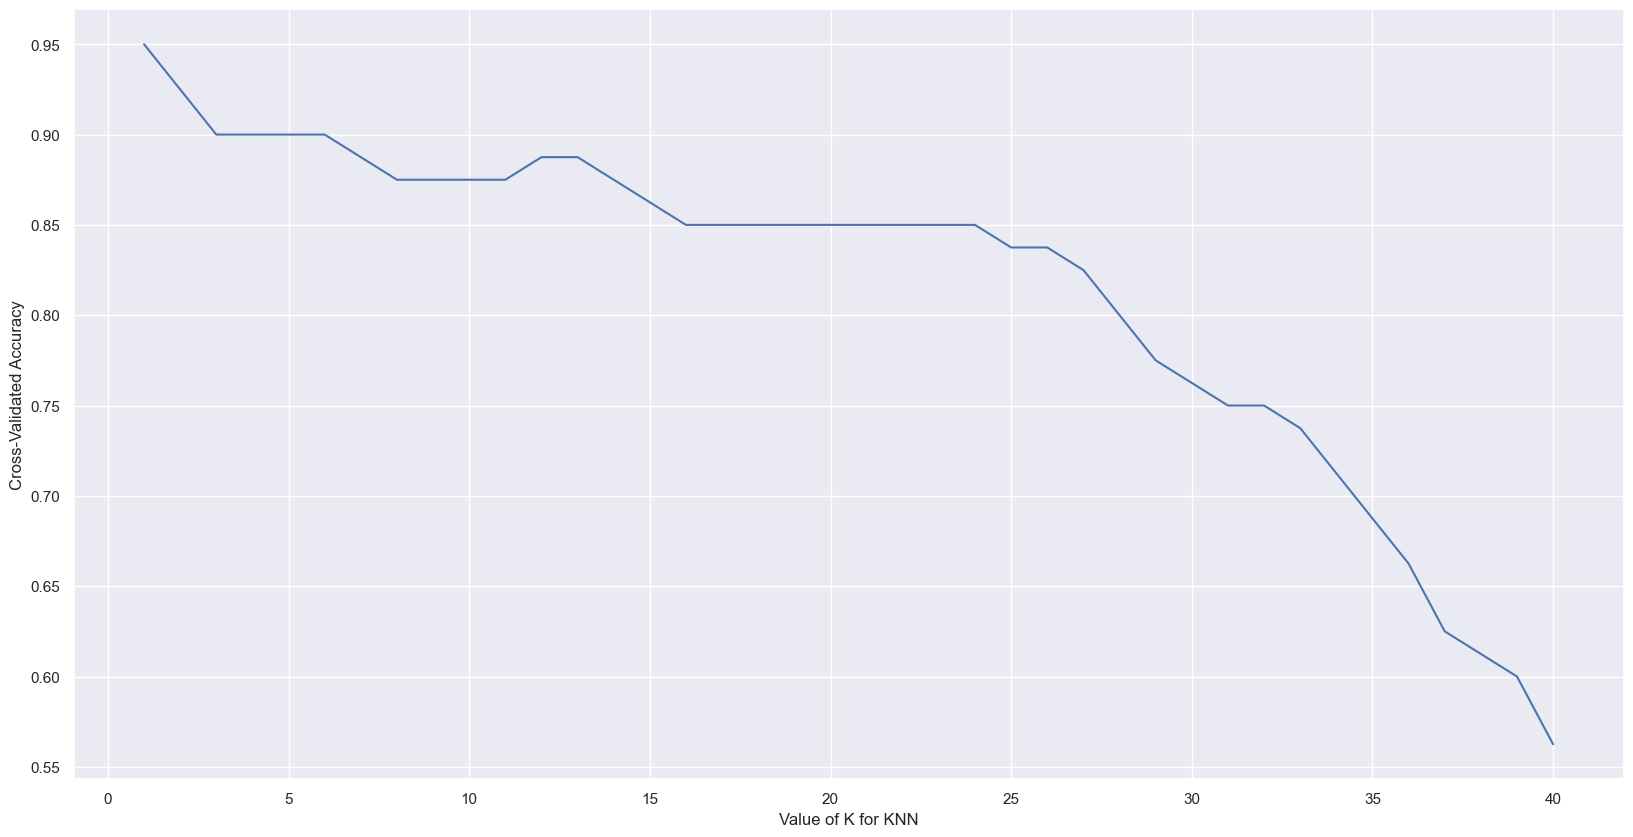

In [52]:
k_range=range(1, 41)
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_train,y_train,cv=10)
    k_scores.append(scores.mean())
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show();

### Interview Questions

In [54]:
## 1. What are the key hyperparameters in KNN?

In [55]:
## KNN algorithm uses hyperparameter, k, which is n_neighbors

In [56]:
## 2. What distance metrics can be used in KNN?

In [57]:
## Distance metrics that can be used in KNN are 1. Euclidean Distance, 2. Manhattan Distance, 3. Minkowski Distance